### 1- Ley de los Grandes Números


Un estudio realizado en una tienda de un centro comercial indica que la cantidad de clientes que frecuentan dicha tienda por día se puede modelar como una distribución de Poisson con parámetro $\lambda = 100$

1. Calcule la probabilidad teórica de que k = 80, 100, 120 clientes frecuenten la tienda. 

In [73]:
from scipy.stats import poisson
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy as sci
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt


mu=100
x = poisson.pmf(80, mu)
y = poisson.pmf(100, mu)
z = poisson.pmf(120, mu)
print(x,y,z)


0.005197854125980293 0.03986099680914883 0.005561064886513308


Se obtienen de esta forma las siguiete probabilidades:
    1. La probabilidad de que K=80 es: 0.005197854125980293 
    2. La probabilidad de que K=100 es: 0.03986099680914883
    3. La probabilidad de que K=120 es: 0.005561064886513308
    
2. Se generaron 4 muestras con la distribución de Poisson con tamaños n = 5, 100, 5000 y 10000.

In [74]:
np.random.seed(10)

muestra5 = np.random.poisson(mu, size=5)
muestra100 = np.random.poisson(mu, size=100)
muestra5000 = np.random.poisson(mu, size=5000)
muestra10000= np.random.poisson(mu, size=10000)


3. Se procede a calcular la probabilidad empírica de que k = 80, 100, 120 clientes frecuenten la tienda. 

In [75]:
def probs(a):
    x=0
    y=0
    z=0
    for i in a:
        if i==80:
            x=x+1
        elif i==100:
            y=y+1
        elif i==120:
            z=z+1
    return [x/len(a),y/len(a),z/len(a)]

print (probs(muestra5))
print (probs(muestra100))
print (probs(muestra5000))
print (probs(muestra10000))



[0.0, 0.2, 0.0]
[0.0, 0.02, 0.0]
[0.005, 0.0416, 0.0056]
[0.0042, 0.0402, 0.0068]


Se obtuvieron los siguientes resultados.

Para la muestra de n=5:
    1. La probabilidad de que K=80 es: 0.0
    2. La probabilidad de que K=100 es: 0.2
    3. La probabilidad de que K=120 es: 0.0
    
Para la muestra de n=100:
    1. La probabilidad de que K=80 es: 0.0
    2. La probabilidad de que K=100 es: 0.02
    3. La probabilidad de que K=120 es: 0.0
    
Para la muestra de n=5000:
    1. La probabilidad de que K=80 es: 0.005
    2. La probabilidad de que K=100 es: 0.0416
    3. La probabilidad de que K=120 es: 0.0056

Para la muestra de n=10000:
    1. La probabilidad de que K=80 es: 0.0042
    2. La probabilidad de que K=100 es: 0.0402
    3. La probabilidad de que K=120 es: 0.0068
    
La diferencia con el valor teorico de la probabilidad se da producto de la densidad de cada muestra. Teóricamente entonces, mientras mas grande sea la muestra, mas cercano sera el valor al resultado teórico.

4.Se generan 4 muestras de tamaño 1000 cada una donde cada elemento de dicha muestra es la media de una distribución de Poisson de tamaño n = 5, 100, 5000, 10000. Cada una con $\lambda = 100$

In [85]:
l1=[]
l2=[]
l3=[]
l4=[]
for i in range(1000):
    l1.append(np.mean(np.random.poisson(mu, size=5)))
    l2.append(np.mean(np.random.poisson(mu, size=100)))
    l3.append(np.mean(np.random.poisson(mu, size=5000)))
    l4.append(np.mean(np.random.poisson(mu, size=10000)))
    

    
    

5.La media teorica de todas estas distribuciones debería ser igual al $\lambda$ de la distribución, por lo tanto, igual a 100.

6.Se generan los scatterplot para cada una de las muestras anteriores.

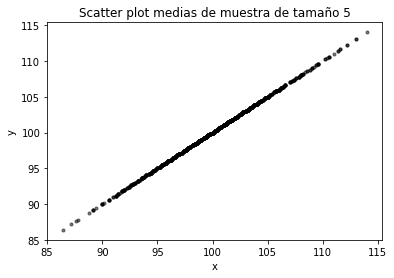

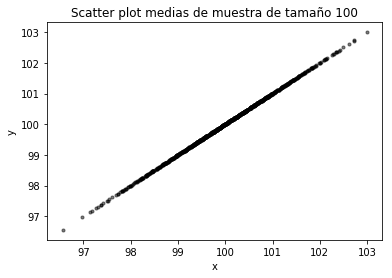

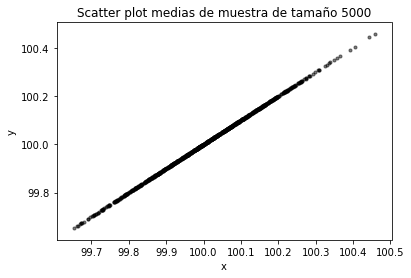

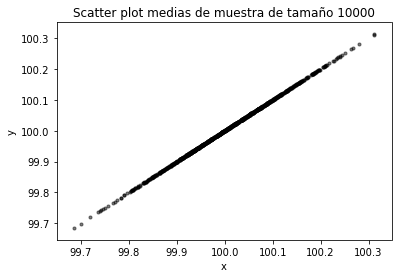

In [84]:
colors = (0,0,0)
area = np.pi*3 
plt.scatter(l1, l1, s=area, c=colors, alpha=0.5)
plt.title('Scatter plot medias de muestra de tamaño 5')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

plt.scatter(l2, l2, s=area, c=colors, alpha=0.5)
plt.title('Scatter plot medias de muestra de tamaño 100')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

plt.scatter(l3, l3, s=area, c=colors, alpha=0.5)
plt.title('Scatter plot medias de muestra de tamaño 5000')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

plt.scatter(l4, l4, s=area, c=colors, alpha=0.5)
plt.title('Scatter plot medias de muestra de tamaño 10000')
plt.xlabel('x')
plt.ylabel('y')
plt.show()
    

Se logra observar que mientras mayor es la densidad de la muestra, mayor sera la densidad de los datos sobre el $\lambda$ de la distribución y menor sera la disperción de las medias, dados los ejes de los gráficos.

7.Se generan boxplots para cada una de las muestras anteriores.

{'whiskers': [<matplotlib.lines.Line2D at 0x1a8d6b2f6a0>,
 'caps': [<matplotlib.lines.Line2D at 0x1a8d6b2ff60>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a8d6b2f550>],
 'medians': [<matplotlib.lines.Line2D at 0x1a8d6b5e7f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a8d6b5ec18>],
 'means': []}

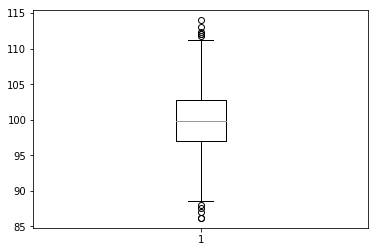

In [93]:
plt.boxplot(l1)


{'whiskers': [<matplotlib.lines.Line2D at 0x1a8d6bb8dd8>,
 'caps': [<matplotlib.lines.Line2D at 0x1a8d6bbd6d8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a8d6bb8c88>],
 'medians': [<matplotlib.lines.Line2D at 0x1a8d6bbdf28>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a8d6bad390>],
 'means': []}

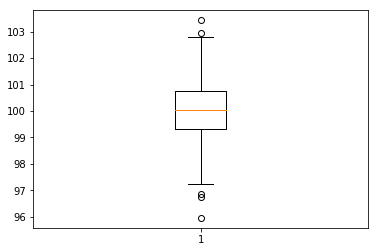

In [96]:
plt.boxplot(l2)



{'whiskers': [<matplotlib.lines.Line2D at 0x1a8d6b95be0>,
 'caps': [<matplotlib.lines.Line2D at 0x1a8d6c254e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a8d6b95a90>],
 'medians': [<matplotlib.lines.Line2D at 0x1a8d6c25d30>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a8d6c4d198>],
 'means': []}

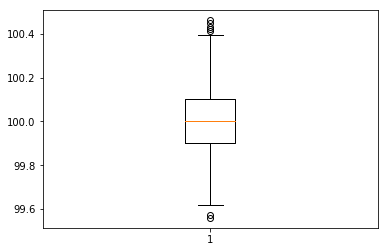

In [97]:
plt.boxplot(l3)


{'whiskers': [<matplotlib.lines.Line2D at 0x1a8d6eb9b00>,
 'caps': [<matplotlib.lines.Line2D at 0x1a8d6ec1400>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a8d6eb99b0>],
 'medians': [<matplotlib.lines.Line2D at 0x1a8d6ec1c50>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a8d6ec80b8>],
 'means': []}

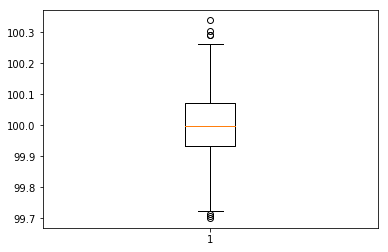

In [98]:
plt.boxplot(l4)


A partir de los boxplots se logra observar nuevamente que mientras mayor es el tamaño de la muestra, mas densidad de valores habra cerca del $\lambda$ de la distribución y menor sera la dispersión. Esto se logra observar gracias a los bigotes de los boxplots, que para cada boxplot se van haciendo mas cortos.

Para cada caso se dieron outliners, los cuales son producto de la aletoriedad de los datos respecto a la distribución.